In [7]:
import os, data_new
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

In [2]:
result_root = "E:\\Results\\Respiration\\"

meeting_number = 4
curr_result_path = os.path.join(result_root, f"MTG_{meeting_number}", "Organized_Data")

In [3]:
datatype = os.listdir(curr_result_path)
sample_type = datatype[2]
selected_path = os.path.join(curr_result_path, sample_type)
selected_data = os.listdir(selected_path)
sample_patient = selected_data[0]
patient_path = os.path.join(selected_path, sample_patient)
print(patient_path)

E:\Results\Respiration\MTG_4\Organized_Data\Mammo\27843.xlsx


In [4]:
datatype

['HCC_trained', 'HCC_untrained', 'Mammo']

In [5]:
sample_data = pd.read_excel(patient_path)
print(list(sample_data.keys()))

['Unnamed: 0', 'Inter_RPD', 'LVL_Mean', 'LVL_STD', 'LVL_CV', 'Inter_STB', 'VD_Mean', 'VD_STD', 'VD_CV']


In [7]:
level_means = list(sample_data["LVL_Mean"])
level_stds = list(sample_data["LVL_STD"])
level_cvs = list(sample_data["LVL_CV"])
distance_means = list(sample_data["VD_Mean"])
distance_stds = list(sample_data["VD_STD"])
distance_cvs = list(sample_data["VD_CV"])

In [8]:
reproducibility = data_new.reproducibility(level_means)
stability = data_new.stability(distance_means)
print(f"Reproducibility: {reproducibility:.4f}")
print(f"Stability: {stability:.4f}")

Reproducibility: 0.4892
Stability: 0.6569


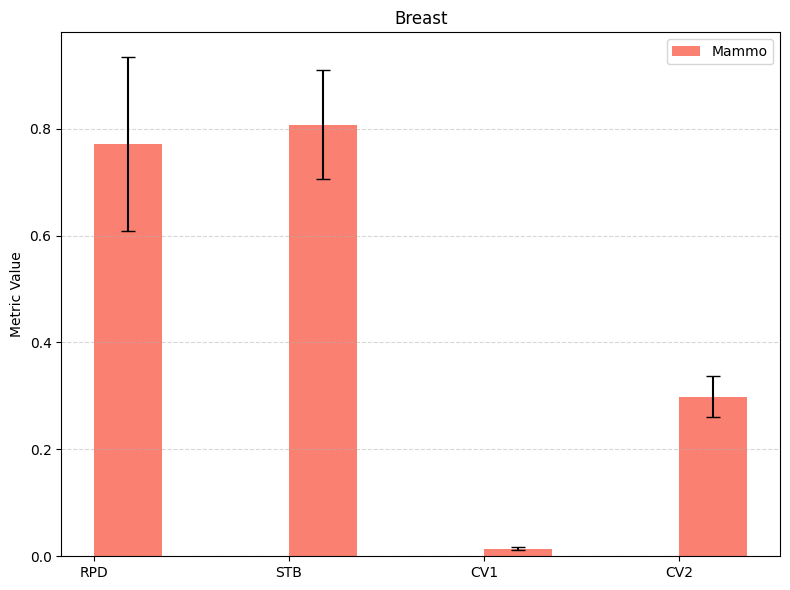

<Figure size 640x480 with 0 Axes>

In [ ]:
mammo = {
    "RPD": (0.7713, 0.3246),
    "STB": (0.8077, 0.2040),
    "CV1": (0.0145, 0.0057),
    "CV2": (0.2983, 0.0767),
}

metrics = ["RPD", "STB", "CV1", "CV2"]

mammo_means = [mammo[m][0] for m in metrics]
mammo_stds = [mammo[m][1]/2 for m in metrics]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(x + width/2, mammo_means, width, yerr=mammo_stds, label="Mammo", color='salmon', capsize=5)

ax.set_ylabel("Metric Value")
ax.set_title("Breast")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

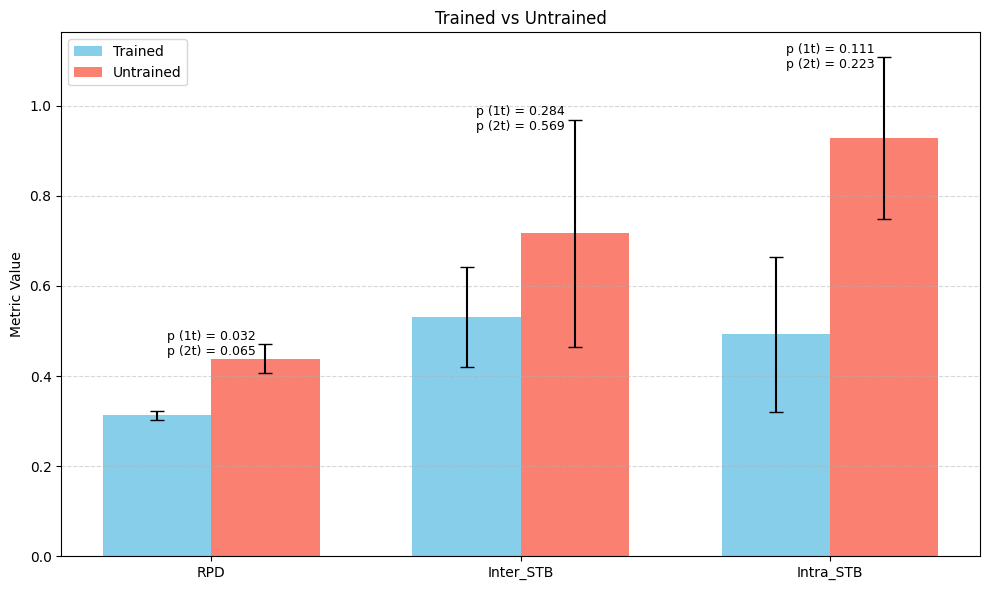

In [9]:
metrics = ["RPD", "Inter_STB", "Intra_STB"]

untrained = {
    "RPD": (0.4708, 0.4063),
    "Inter_STB": (0.9684, 0.4647),
    "Intra_STB": (1.1072, 0.7476),
}

trained = {
    "RPD": (0.3030, 0.3223),
    "Inter_STB": (0.6408, 0.4209),
    "Intra_STB": (0.6646, 0.3205),
}

# 평균 및 표준편차 계산
trained_means = [np.mean(trained[m]) for m in metrics]
untrained_means = [np.mean(untrained[m]) for m in metrics]
trained_stds = [np.std(trained[m]) for m in metrics]
untrained_stds = [np.std(untrained[m]) for m in metrics]

# 막대 위치
x = np.arange(len(metrics))
width = 0.35

# Figure 생성
fig, ax = plt.subplots(figsize=(10, 6))

# 막대 그리기
bars1 = ax.bar(x - width/2, trained_means, width, yerr=trained_stds, label="Trained", color="skyblue", capsize=5)
bars2 = ax.bar(x + width/2, untrained_means, width, yerr=untrained_stds, label="Untrained", color="salmon", capsize=5)

# t-test 수행 및 p-value 표시
for i, metric in enumerate(metrics):
    t_stat, p_two_tailed = ttest_ind(trained[metric], untrained[metric])
    
    # one-tailed p-value: 가설방향 설정 (ex: trained < untrained)
    if t_stat < 0:
        p_one_tailed = p_two_tailed / 2
    else:
        p_one_tailed = 1 - p_two_tailed / 2  # 방향이 반대면 보정

    # 표시 텍스트
    text = f"p (1t) = {p_one_tailed:.3f}\np (2t) = {p_two_tailed:.3f}"
    
    # y 위치는 두 그룹 평균 중 큰 값 위에
    y_pos = max(trained_means[i] + trained_stds[i], untrained_means[i] + untrained_stds[i]) - 0.03
    ax.text(x[i], y_pos, text, ha='center', va='bottom', fontsize=9)

# 축 설정
ax.set_ylabel("Metric Value")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_title("Trained vs Untrained")
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

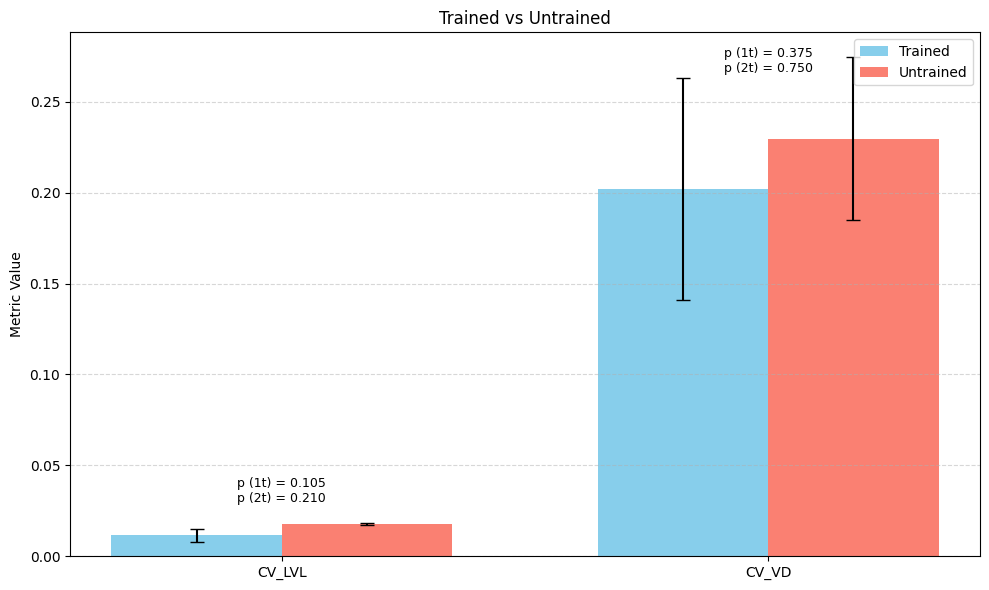

In [23]:
metrics = ["CV_LVL", "CV_VD"]

untrained = {
    "CV_LVL": (0.0173, 0.0183),
    "CV_VD": (0.2745, 0.1850),
}

trained = {
    "CV_LVL": (0.0149, 0.0080),
    "CV_VD": (0.2631, 0.1411),
}

# 평균 및 표준편차 계산
trained_means = [np.mean(trained[m]) for m in metrics]
untrained_means = [np.mean(untrained[m]) for m in metrics]
trained_stds = [np.std(trained[m]) for m in metrics]
untrained_stds = [np.std(untrained[m]) for m in metrics]

# 막대 위치
x = np.arange(len(metrics))
width = 0.35

# Figure 생성
fig, ax = plt.subplots(figsize=(10, 6))

# 막대 그리기
bars1 = ax.bar(x - width/2, trained_means, width, yerr=trained_stds, label="Trained", color="skyblue", capsize=5)
bars2 = ax.bar(x + width/2, untrained_means, width, yerr=untrained_stds, label="Untrained", color="salmon", capsize=5)

# t-test 수행 및 p-value 표시
for i, metric in enumerate(metrics):
    t_stat, p_two_tailed = ttest_ind(trained[metric], untrained[metric])
    
    # one-tailed p-value: 가설방향 설정 (ex: trained < untrained)
    if t_stat < 0:
        p_one_tailed = p_two_tailed / 2
    else:
        p_one_tailed = 1 - p_two_tailed / 2  # 방향이 반대면 보정

    # 표시 텍스트
    text = f"p (1t) = {p_one_tailed:.3f}\np (2t) = {p_two_tailed:.3f}"
    
    # y 위치는 두 그룹 평균 중 큰 값 위에
    if i == 0:
        y_pos = max(trained_means[i] + trained_stds[i], untrained_means[i] + untrained_stds[i]) + 0.01
    else:
        y_pos = max(trained_means[i] + trained_stds[i], untrained_means[i] + untrained_stds[i]) - 0.01
    ax.text(x[i], y_pos, text, ha='center', va='bottom', fontsize=9)

# 축 설정
ax.set_ylabel("Metric Value")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_title("Trained vs Untrained")
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

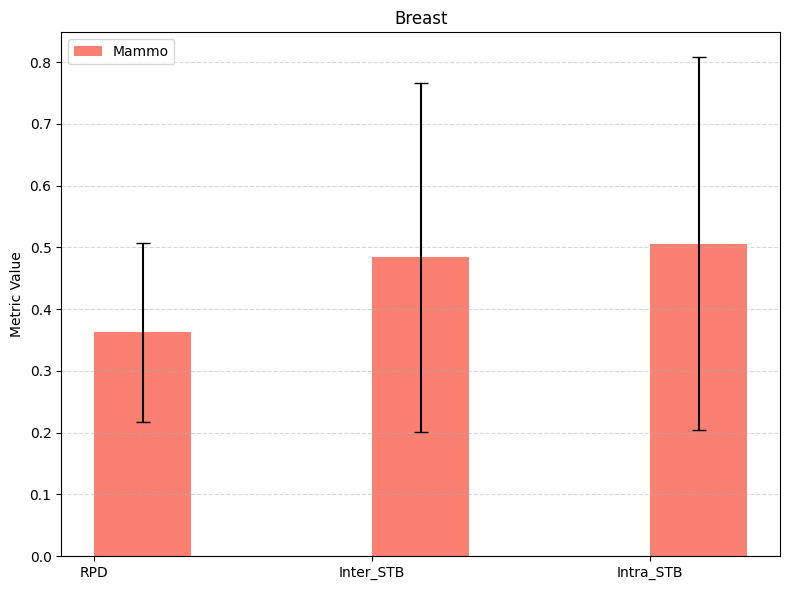

In [26]:
metrics = ["RPD", "Inter_STB", "Intra_STB"]

mammo_metric1 = {
    "RPD": (0.5074, 0.2181),
    "Inter_STB": (0.7665, 0.2017),
    "Intra_STB": (0.8077, 0.2040),
}

# 평균 및 표준편차 계산
mammo_means = [np.mean(mammo_metric1[m]) for m in metrics]
mammo_stds = [np.std(mammo_metric1[m]) for m in metrics]

# 막대 위치
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(x + width/2, mammo_means, width, yerr=mammo_stds, label="Mammo", color='salmon', capsize=5)

# 축 설정
ax.set_ylabel("Metric Value")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_title("Breast")
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

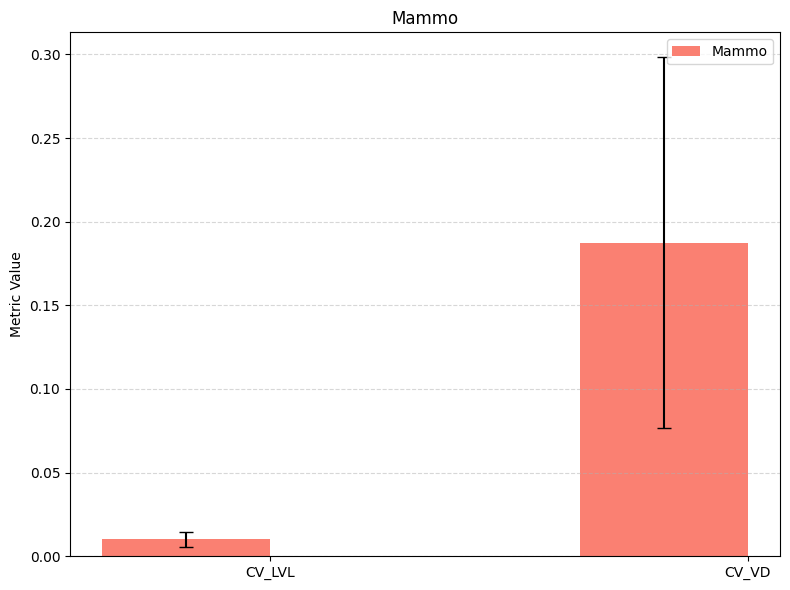

In [28]:
metrics = ["CV_LVL", "CV_VD"]

mammo_metric2 = {
    "CV_LVL": (0.0145, 0.0057),
    "CV_VD": (0.2983, 0.0767),
}

# 평균 및 표준편차 계산
mammo_means = [np.mean(mammo_metric2[m]) for m in metrics]
mammo_stds = [np.std(mammo_metric2[m]) for m in metrics]

# 막대 위치
x = np.arange(len(metrics))
width = 0.35

# Figure 생성
fig, ax = plt.subplots(figsize=(8, 6))

# 막대 그리기
bars = ax.bar(x - width/2, mammo_means, width, yerr=mammo_stds, label="Mammo", color="salmon", capsize=5)

# 축 설정
ax.set_ylabel("Metric Value")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_title("Mammo")
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [3]:
import os, data_property
import pandas as pd

analysis_root = "E:\\Results\\Respiration\\MTG_4\\Analysis\\"
untrained_analysis = pd.read_excel(os.path.join(analysis_root, "HCC_untrained_Analysis.xlsx"))
trained_analysis = pd.read_excel(os.path.join(analysis_root, "HCC_trained_Analysis.xlsx"))

print(data_property.run_wilcoxon_rank_sum(untrained_analysis["Reproducibility"], trained_analysis["Reproducibility"]))
print(data_property.run_wilcoxon_rank_sum(untrained_analysis["Inter_STB"], trained_analysis["Inter_STB"]))
print(data_property.run_wilcoxon_rank_sum(untrained_analysis["Intra_STB"], trained_analysis["Intra_STB"]))
print(data_property.run_wilcoxon_rank_sum(untrained_analysis["CV_LVL"], trained_analysis["CV_LVL"]))
print(data_property.run_wilcoxon_rank_sum(untrained_analysis["CV_VD"], trained_analysis["CV_VD"]))

(np.float64(297.0), np.float64(0.08514664294070128))
(np.float64(332.0), np.float64(0.010338320853288766))
(np.float64(313.0), np.float64(0.03513302694830676))
(np.float64(223.0), np.float64(0.971182467860372))
(np.float64(235.0), np.float64(0.8190587796310534))


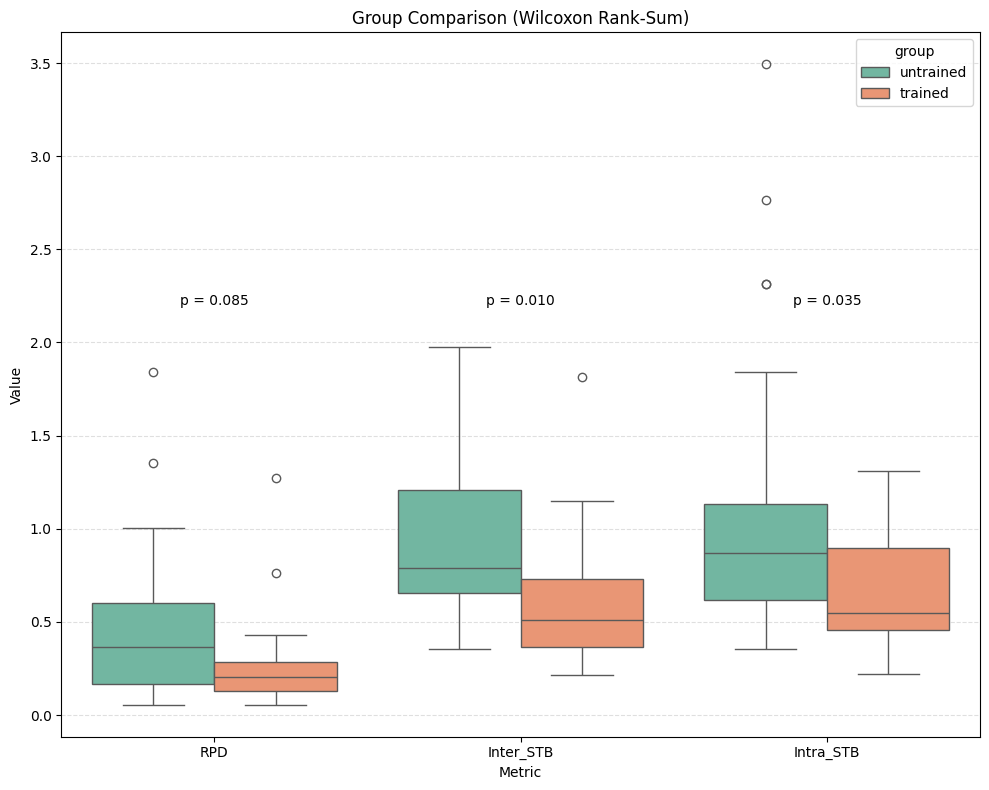

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({
    "group": ["untrained"]*30 + ["trained"]*15,
    "RPD": untrained_analysis["Reproducibility"].tolist() + trained_analysis["Reproducibility"].tolist(),
    "Inter_STB": untrained_analysis["Inter_STB"].tolist() + trained_analysis["Inter_STB"].tolist(),
    "Intra_STB": untrained_analysis["Intra_STB"].tolist() + trained_analysis["Intra_STB"].tolist(),
})

df_long = pd.melt(df, id_vars="group", var_name="Metric", value_name="Value")

plt.figure(figsize=(10, 8))
sns.boxplot(x="Metric", y="Value", hue="group", data=df_long, palette="Set2")

pvalues = [0.0851, 0.0103, 0.0351]
x_offset = 0.2

for i, value in enumerate(pvalues):
    plt.text(i, 2.2, f"p = {value:.3f}", ha="center", fontsize=10, color="black")

plt.title("Group Comparison (Wilcoxon Rank-Sum)")
plt.grid(True, axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

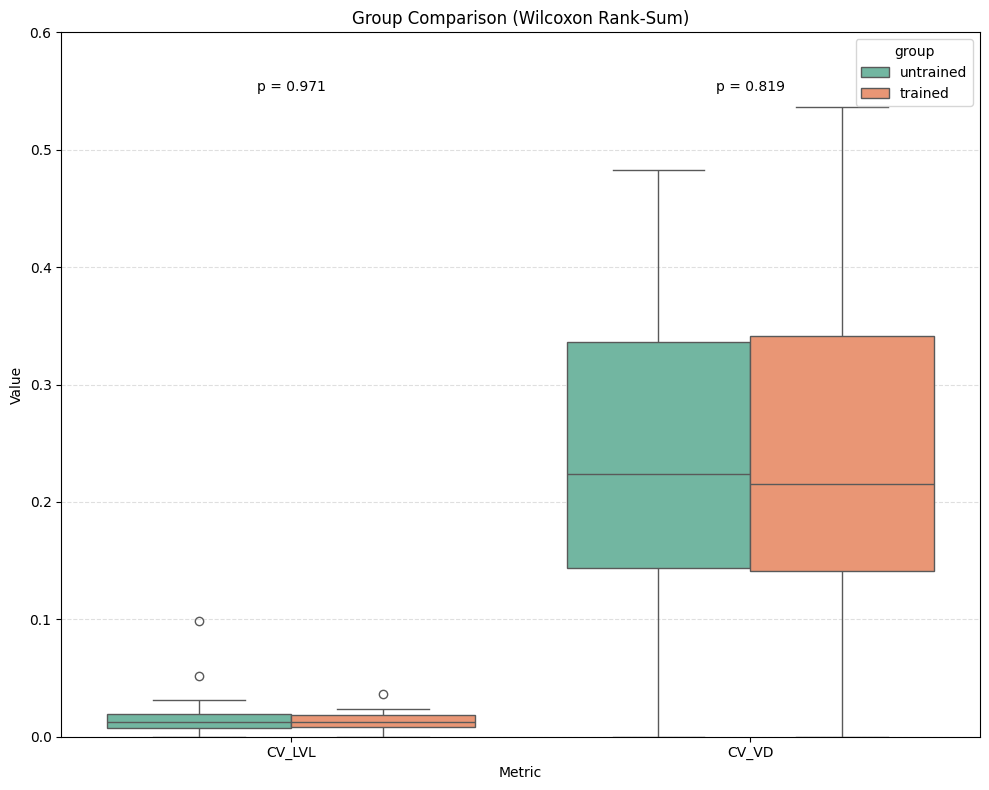

In [54]:
df = pd.DataFrame({
    "group": ["untrained"]*30 + ["trained"]*15,
    "CV_LVL": untrained_analysis["CV_LVL"].tolist() + trained_analysis["CV_LVL"].tolist(),
    "CV_VD": untrained_analysis["CV_VD"].tolist() + trained_analysis["CV_VD"].tolist(),
})

df_long = pd.melt(df, id_vars="group", var_name="Metric", value_name="Value")

plt.figure(figsize=(10, 8))
sns.boxplot(x="Metric", y="Value", hue="group", data=df_long, palette="Set2")

plt.ylim(0.0, 0.6)

pvalues = [0.9712, 0.8191]
x_offset = 0.2

for i, value in enumerate(pvalues):
    plt.text(i, 0.55, f"p = {value:.3f}", ha="center", fontsize=10, color="black")

plt.title("Group Comparison (Wilcoxon Rank-Sum)")
plt.grid(True, axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

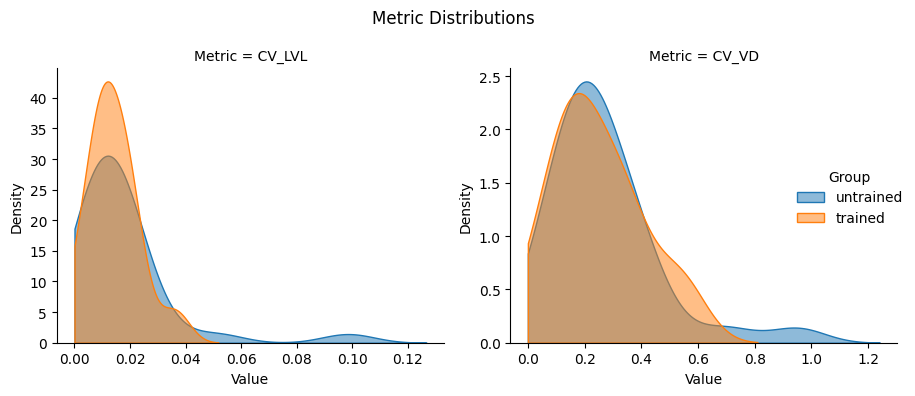

In [ ]:
g = sns.FacetGrid(df_long, col="Metric", hue="group", sharex=False, sharey=False, col_wrap=2, height=4)
g.map(sns.kdeplot, "Value", fill=True, alpha=0.5, clip=(0, None))
g.add_legend(title="Group")
g.fig.suptitle("Metric Distributions")
g.fig.tight_layout()
plt.show()

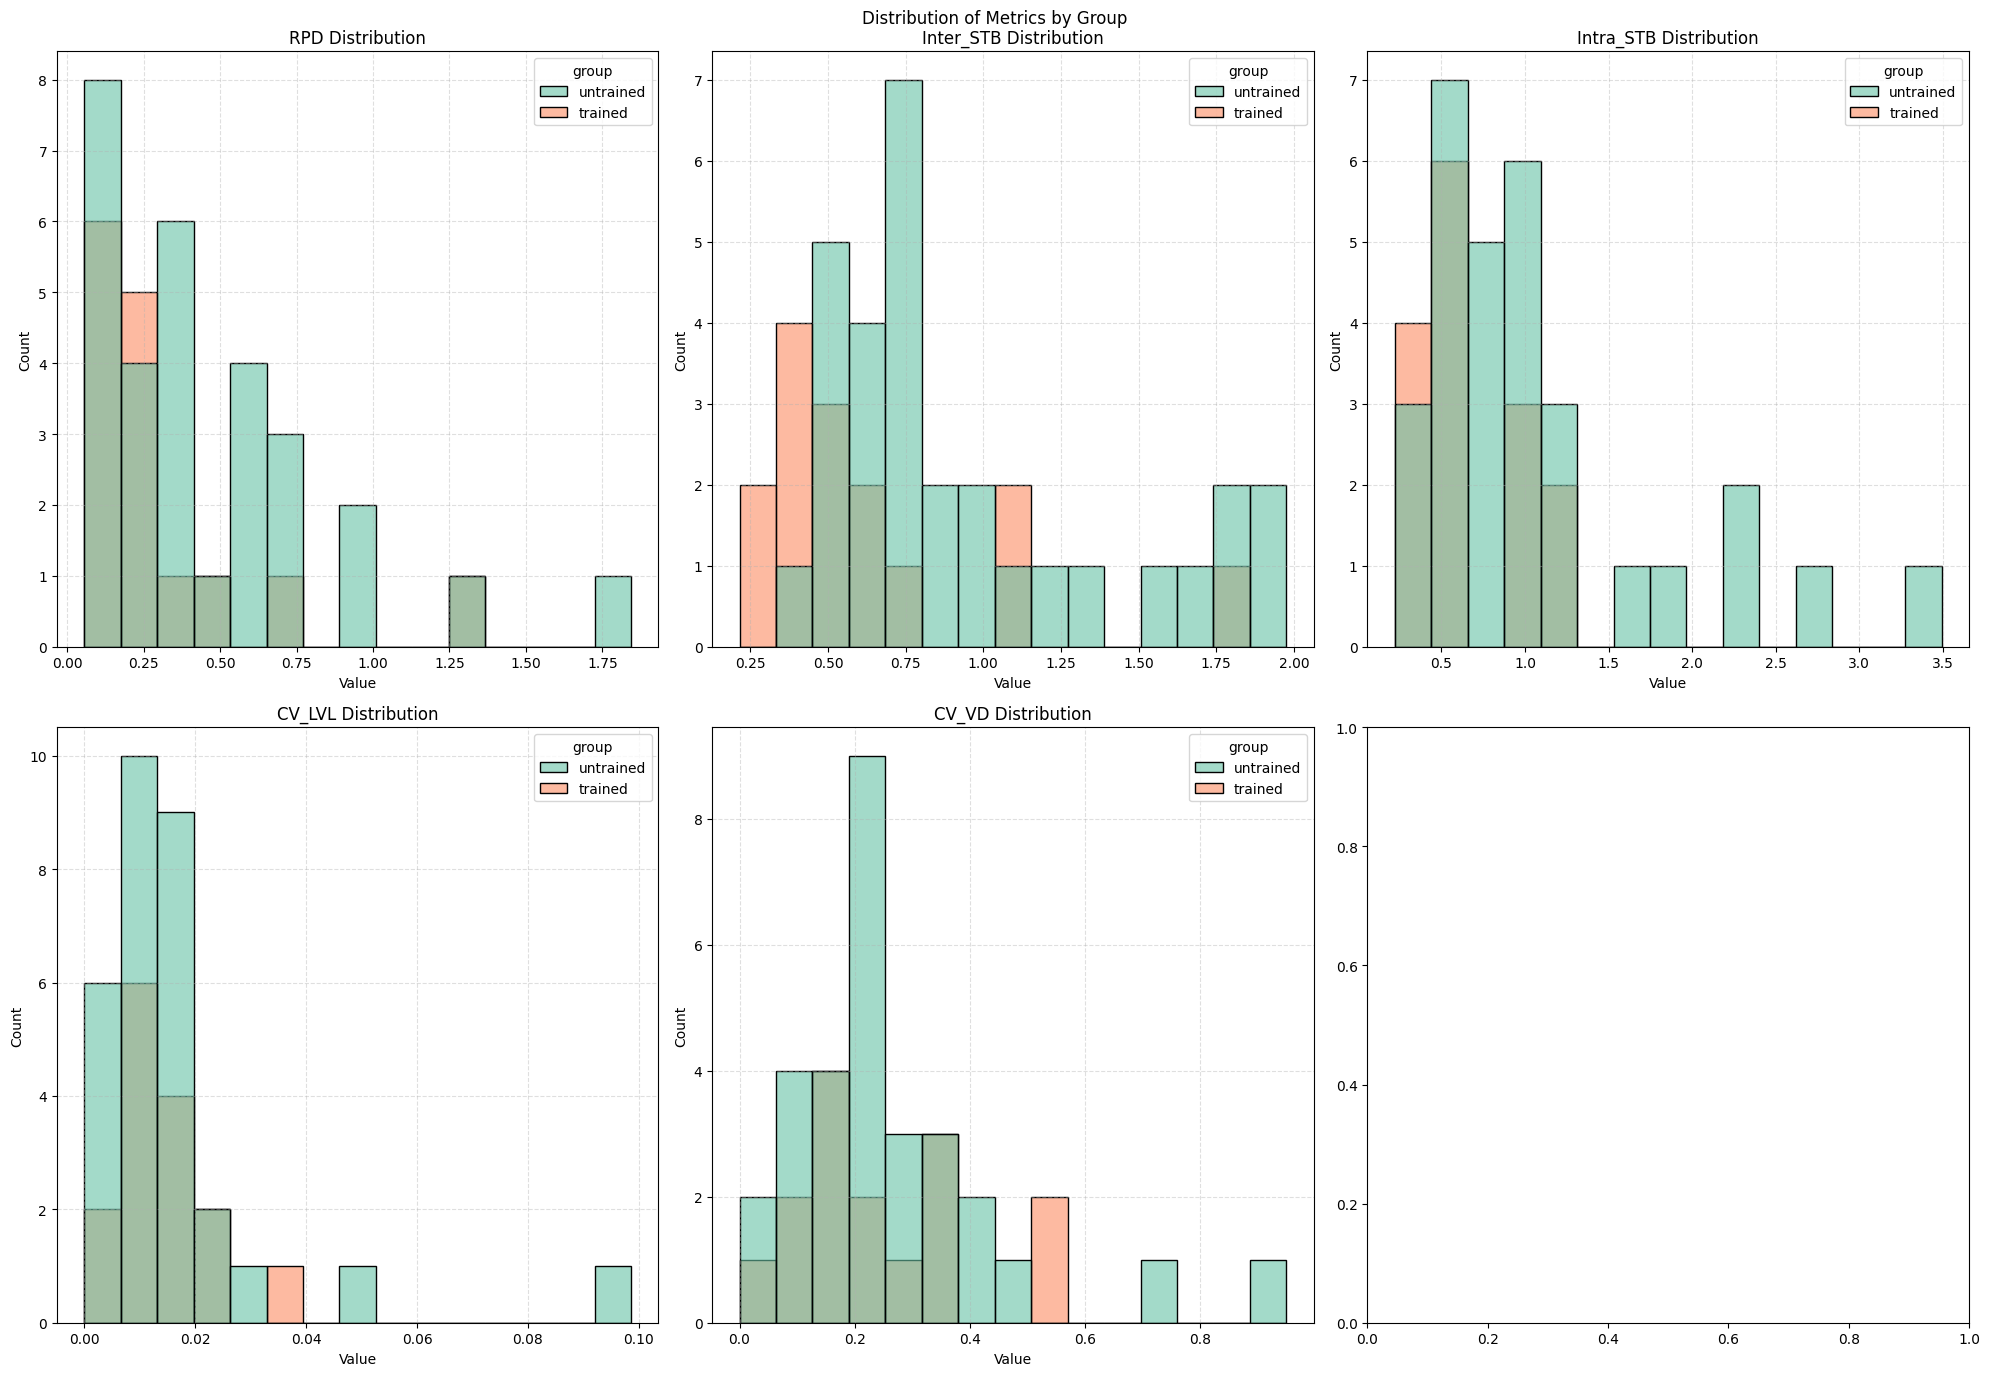

In [69]:
total_df = pd.DataFrame({
    "group": ["untrained"]*30 + ["trained"]*15,
    "RPD": untrained_analysis["Reproducibility"].tolist() + trained_analysis["Reproducibility"].tolist(),
    "Inter_STB": untrained_analysis["Inter_STB"].tolist() + trained_analysis["Inter_STB"].tolist(),
    "Intra_STB": untrained_analysis["Intra_STB"].tolist() + trained_analysis["Intra_STB"].tolist(),
    "CV_LVL": untrained_analysis["CV_LVL"].tolist() + trained_analysis["CV_LVL"].tolist(),
    "CV_VD": untrained_analysis["CV_VD"].tolist() + trained_analysis["CV_VD"].tolist(),
})

df_long = pd.melt(total_df, id_vars="group", var_name="Metric", value_name="Value")

metrics = df_long["Metric"].unique()
fig, axes = plt.subplots(2,3,figsize=(20,14))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    ax = axes[i]
    sns.histplot(data=df_long[df_long["Metric"]==metric],
                 x="Value",
                 hue="group",
                 bins=15,
                 kde=False,
                 alpha=0.6,
                 palette="Set2",
                 ax=ax)
    ax.set_title(f"{metric} Distribution")
    ax.grid(True, linestyle="--", alpha=0.4)

fig.suptitle("Distribution of Metrics by Group")
plt.tight_layout()
plt.show()